# This case study consists of 1000 marks and the solution file is expected to be submitted in the upcoming session for evaluation.

## Statistics 

Statistics is the science of collecting, organizing, presenting, analyzing, and interpreting data to help in making more
effective decisions.

➢ Statistical Analysis is implemented to manipulate, summarize and investigate data, so that useful decision-making information results are obtained.

## Types of Statistics

![alt text](../assets/Types_stats.png "Types of Statistics")

Any machine learning models that you build are only as good as the data that you provide them. The first step in understanding your data is to actually look at some raw values and calculate some basic statistics.
You Must Understand Your Data

Understanding the data that you have is critically important.

You can run techniques and algorithms on your data, but it is not until you take the time to truly understand your dataset that you can fully understand the context of the results you achieve.

Better Understanding Equals Better Results

A deeper understanding of your data will give you better results.

Taking the time to study the data you have will help you in ways that are less obvious. You build an intuition for the data and for the entities that individual records or observations represent. These can bias you towards specific techniques (for better or worse), but you can also be inspired.

For example, examine your data in detail may trigger ideas for specific techniques to investigate:

Data Cleaning. You may discover missing or corrupt data and think of various data cleaning operations to perform such as marking or removing bad data and imputing missing data.
Data Transforms. You may discover that some attributes have familiar distributions such as Gaussian or exponential giving you ideas of scaling or log or other transforms you could apply.
Data Modeling. You may notice properties of the data such as distributions or data types that suggest the use (or to not use) specific machine learning algorithms.

## Introduction to Basic Terms

➢ Variable - A characteristic about each individual element of a population/sample.

➢ Data (singular) - A value of the associated variable with one element of a population/sample. This value may be a
number, a word, or a symbol.

➢ Data (plural) - A set of values collected for the variable from each of the elements belonging to the sample.

➢ Experiment - A planned activity whose results yield a set of data.

➢ Population - The entire collection/set of individuals/objects/events of interest whose properties are to be analyzed. There are two kinds:

    • Finite
    • Infinite

➢ Sample – A portion, or part, of the population of interest

➢ Parameter - A numerical value which summarizes the entire population data.

➢ Statistics - A numerical value which summarizes the sample data.

## What comes under Descriptive Stats

![descriptive stats](../assets/descriptive_stats.png "descriptive stats")

# Descriptive Statitics

Below list of  descriptives statistics that is  recommended to look at when reviewing your dataset :

    Peek at the first few rows of your data
    Review the number of rows and columns you ave.
    Review the data types of each column
    Take a look at the class distribution (for classification problems)
    Calculate a simple 5-number summary for each column
    Review the standard deviations for each numerical column
    Check the skewness of each column, handy to see what transforms to apply
    Review the correlations between attributes

## Kinds of Variables

![](../assets/six_sigma_data_types.jpg)

In [98]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline

plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

# from ggplot import *

import pandas as pd

## Data Description 

source : https://archive.ics.uci.edu/ml/datasets/Wine+Quality

    Relevant Information:

       The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
       For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
       Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
       are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

       These datasets can be viewed as classification or regression tasks.
       The classes are ordered and not balanced (e.g. there are munch more normal wines than
       excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
       or poor wines. Also, we are not sure if all input variables are relevant. So
       it could be interesting to test feature selection methods. 

    Number of Instances: red wine - 1599; white wine - 4898. 

    Number of Attributes: 11 + output attribute

    Note: several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

    Attribute information:

           For more information, read [Cortez et al., 2009].

           Input variables (based on physicochemical tests):
           1 - fixed acidity
           2 - volatile acidity
           3 - citric acid
           4 - residual sugar
           5 - chlorides
           6 - free sulfur dioxide
           7 - total sulfur dioxide
           8 - density
           9 - pH
           10 - sulphates
           11 - alcohol
           Output variable (based on sensory data): 
           12 - quality (score between 0 and 10)

    Missing Attribute Values: None

### Load dataset from 
#### 1.https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [3]:
import pandas as pd
from scipy import stats
import matplotlib as plt
import math 

In [45]:
# # Create two dataframes

# cols=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

red_wine =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",delimiter=';',names=["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality"],header=0)

white_wine =pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",delimiter=';',names=["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality"],header=0)


In [46]:
red_wine.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [47]:
white_wine.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

### Add column 'color' in dataframes
"R" : red-wine color <br>
"W" : White-wine color

In [48]:
red_wine["red_wine_color"]='R'

In [49]:
red_wine.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality red_wine_color  
0      9.4        5              R  
1      9.8        5              R  
2      9.8        5              R  
3      9.8        6              R  
4      9.4        5              R

In [50]:
white_wine["white_wine_color"]='W'

In [51]:
white_wine.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality white_wine_color  
0      8.8        6                W  
1      9.5        6                W  
2     10.1        6                W  
3      9.9        6                W  
4      9.9        6                W

### Find mean of "quality" in both without using inbuilt-function

In [52]:
red_wine_mean=sum(red_wine['quality'])/len(red_wine['quality'])
white_wine_mean=sum(white_wine['quality'])/len(white_wine['quality'])
# red_wine[""quality""]

print("white mean =",white_wine_mean)
print("red mean =",red_wine_mean)

white mean = 5.87790935075541
red mean = 5.6360225140712945


In [53]:
#Verify the same using in-built function
a=white_wine['quality'].mean()
b=red_wine['quality'].mean()

print("white mean =",b)
print("red mean =",a)

white mean = 5.6360225140712945
red mean = 5.87790935075541


### Find Variance for red_wine for fixed acidity features without using in-built function

<img src='https://cdn1.byjus.com/wp-content/uploads/2019/08/variance-and-standard-deviation-formula.png'/>

In [87]:
# step 1 of calculation of variance
xbar=sum(red_wine['fixed_acidity'])/len(red_wine['fixed_acidity'])
xi_xbar=((red_wine['fixed_acidity']-xbar)**2)

E=(sum(xi_xbar)/(len(xi_xbar)))
E

3.0295205688671296

3.0295205688671296

In [100]:
#Alterate way Variance


3.0295205688671296

### Find Variance for red_wine all features and convert into df

In [68]:
red_wine_var_df = pd.DataFrame({"Variance":np.var(red_wine)}).rename_axis("Features").reset_index()
red_wine_var_df

Features     Variance
0          fixed_acidity     3.029521
1       volatile_acidity     0.032042
2            citric_acid     0.037924
3         residual_sugar     1.986654
4              chlorides     0.002214
5    free_sulfur_dioxide   109.346457
6   total_sulfur_dioxide  1081.425636
7                density     0.000004
8                     pH     0.023820
9              sulphates     0.028715
10               alcohol     1.134937
11               quality     0.651761

### Find standard deviation for red_wine : fixed acidity without using in-built function

<img src='https://cdn1.byjus.com/wp-content/uploads/2019/08/variance-and-standard-deviation-formula.png'/>

In [96]:
xbar=sum(red_wine['fixed_acidity'])/len(red_wine['fixed_acidity'])
xbar_xi=((red_wine['fixed_acidity']-xbar)**2)
xbar_xi
E=(sum(xbar_xi)/(len(xbar_xi)))
standard_daviation=(E**0.5)
print('standard Daviation',standard_daviation)

standard Daviation 1.7405518001102782


1.7405518001102782

In [110]:
#Alterate way for standard deviation

1.7405518001102782

### Find Standard deviation for red_wine all features and convert into df

In [105]:
# red_wine['fixed_acidity'].std()
red_wine['volatile_acidity'].std()

0.17905970415353498

In [106]:
red_wine_standard_Deviation_df = pd.DataFrame({"standard Daviation":np.std(red_wine)}).rename_axis("Features").reset_index()
red_wine_standard_Deviation_df

Features  standard Daviation
0          fixed_acidity            1.740552
1       volatile_acidity            0.179004
2            citric_acid            0.194740
3         residual_sugar            1.409487
4              chlorides            0.047051
5    free_sulfur_dioxide           10.456886
6   total_sulfur_dioxide           32.885037
7                density            0.001887
8                     pH            0.154338
9              sulphates            0.169454
10               alcohol            1.065334
11               quality            0.807317

Features        Std
0          fixed acidity   1.740552
1       volatile acidity   0.179004
2            citric acid   0.194740
3         residual sugar   1.409487
4              chlorides   0.047051
5    free sulfur dioxide  10.456886
6   total sulfur dioxide  32.885037
7                density   0.001887
8                     pH   0.154338
9              sulphates   0.169454
10               alcohol   1.065334
11               quality   0.807317

### Combine both the red wine and white wine
all_wine = pd.concat([red_wine,white_wine],axis=0,sort=True)

In [116]:
all_wine = pd.concat([red_wine,white_wine],axis=0,sort=True)
all_wine.head(10)
# all_wine[::-1]

alcohol  chlorides  citric_acid  density  fixed_acidity  \
0      9.4      0.076         0.00   0.9978            7.4   
1      9.8      0.098         0.00   0.9968            7.8   
2      9.8      0.092         0.04   0.9970            7.8   
3      9.8      0.075         0.56   0.9980           11.2   
4      9.4      0.076         0.00   0.9978            7.4   
5      9.4      0.075         0.00   0.9978            7.4   
6      9.4      0.069         0.06   0.9964            7.9   
7     10.0      0.065         0.00   0.9946            7.3   
8      9.5      0.073         0.02   0.9968            7.8   
9     10.5      0.071         0.36   0.9978            7.5   

   free_sulfur_dioxide    pH  quality red_wine_color  residual_sugar  \
0                 11.0  3.51        5              R             1.9   
1                 25.0  3.20        5              R             2.6   
2                 15.0  3.26        5              R             2.3   
3                 17.0  3.16        6              R             1.9   
4                 11.0  3.51        5              R             1.9   
5                 13.0  3.51        5              R             1.8   
6                 15.0  3.30        5              R             1.6   
7                 15.0  3.39        7              R             1.2   
8                  9.0  3.36        7              R             2.0   
9                 17.0  3.35        5              R             6.1   

   sulphates  total_sulfur_dioxide  volatile_acidity white_wine_color  
0       0.56                  34.0              0.70              NaN  
1       0.68                  67.0              0.88              NaN  
2       0.65                  54.0              0.76              NaN  
3       0.58                  60.0              0.28              NaN  
4       0.56                  34.0              0.70              NaN  
5       0.56                  40.0              0.66              NaN  
6       0.46                  59.0              0.60              NaN  
7       0.47                  21.0              0.65              NaN  
8       0.57                  18.0              0.58              NaN  
9       0.80                 102.0              0.50              NaN

In [109]:
all_wine.describe()

alcohol    chlorides  citric_acid      density  fixed_acidity  \
count  6497.000000  6497.000000  6497.000000  6497.000000    6497.000000   
mean     10.491801     0.056034     0.318633     0.994697       7.215307   
std       1.192712     0.035034     0.145318     0.002999       1.296434   
min       8.000000     0.009000     0.000000     0.987110       3.800000   
25%       9.500000     0.038000     0.250000     0.992340       6.400000   
50%      10.300000     0.047000     0.310000     0.994890       7.000000   
75%      11.300000     0.065000     0.390000     0.996990       7.700000   
max      14.900000     0.611000     1.660000     1.038980      15.900000   

       free_sulfur_dioxide           pH      quality  residual_sugar  \
count          6497.000000  6497.000000  6497.000000     6497.000000   
mean             30.525319     3.218501     5.818378        5.443235   
std              17.749400     0.160787     0.873255        4.757804   
min               1.000000     2.720000     3.000000        0.600000   
25%              17.000000     3.110000     5.000000        1.800000   
50%              29.000000     3.210000     6.000000        3.000000   
75%              41.000000     3.320000     6.000000        8.100000   
max             289.000000     4.010000     9.000000       65.800000   

         sulphates  total_sulfur_dioxide  volatile_acidity  
count  6497.000000           6497.000000       6497.000000  
mean      0.531268            115.744574          0.339666  
std       0.148806             56.521855          0.164636  
min       0.220000              6.000000          0.080000  
25%       0.430000             77.000000          0.230000  
50%       0.510000            118.000000          0.290000  
75%       0.600000            156.000000          0.400000  
max       2.000000            440.000000          1.580000

## Check stats as per groups 

color metric      alcohol    chlorides  citric_acid      density  \
0     R  count  1599.000000  1599.000000  1599.000000  1599.000000   
1     R   mean    10.422983     0.087467     0.270976     0.996747   
2     R    std     1.065668     0.047065     0.194801     0.001887   
3     R    min     8.400000     0.012000     0.000000     0.990070   
4     R    25%     9.500000     0.070000     0.090000     0.995600   
5     R    50%    10.200000     0.079000     0.260000     0.996750   
6     R    75%    11.100000     0.090000     0.420000     0.997835   
7     R    max    14.900000     0.611000     1.000000     1.003690   
0     W  count  4898.000000  4898.000000  4898.000000  4898.000000   
1     W   mean    10.514267     0.045772     0.334192     0.994027   
2     W    std     1.230621     0.021848     0.121020     0.002991   
3     W    min     8.000000     0.009000     0.000000     0.987110   
4     W    25%     9.500000     0.036000     0.270000     0.991723   
5     W    50%    10.400000     0.043000     0.320000     0.993740   
6     W    75%    11.400000     0.050000     0.390000     0.996100   
7     W    max    14.200000     0.346000     1.660000     1.038980   

   fixed_acidity  free_sulfur_dioxide           pH      quality  \
0    1599.000000          1599.000000  1599.000000  1599.000000   
1       8.319637            15.874922     3.311113     5.636023   
2       1.741096            10.460157     0.154386     0.807569   
3       4.600000             1.000000     2.740000     3.000000   
4       7.100000             7.000000     3.210000     5.000000   
5       7.900000            14.000000     3.310000     6.000000   
6       9.200000            21.000000     3.400000     6.000000   
7      15.900000            72.000000     4.010000     8.000000   
0    4898.000000          4898.000000  4898.000000  4898.000000   
1       6.854788            35.308085     3.188267     5.877909   
2       0.843868            17.007137     0.151001     0.885639   
3       3.800000             2.000000     2.720000     3.000000   
4       6.300000            23.000000     3.090000     5.000000   
5       6.800000            34.000000     3.180000     6.000000   
6       7.300000            46.000000     3.280000     6.000000   
7      14.200000           289.000000     3.820000     9.000000   

   residual_sugar    sulphates  total_sulfur_dioxide  volatile_acidity  
0     1599.000000  1599.000000           1599.000000       1599.000000  
1        2.538806     0.658149             46.467792          0.527821  
2        1.409928     0.169507             32.895324          0.179060  
3        0.900000     0.330000              6.000000          0.120000  
4        1.900000     0.550000             22.000000          0.390000  
5        2.200000     0.620000             38.000000          0.520000  
6        2.600000     0.730000             62.000000          0.640000  
7       15.500000     2.000000            289.000000          1.580000  
0     4898.000000  4898.000000           4898.000000       4898.000000  
1        6.391415     0.489847            138.360657          0.278241  
2        5.072058     0.114126             42.498065          0.100795  
3        0.600000     0.220000              9.000000          0.080000  
4        1.700000     0.410000            108.000000          0.210000  
5        5.200000     0.470000            134.000000          0.260000  
6        9.900000     0.550000            167.000000          0.320000  
7       65.800000     1.080000            440.000000          1.100000

### Make a scatter plot matrix using seaborn to visualize the data and the relationship between the different features.

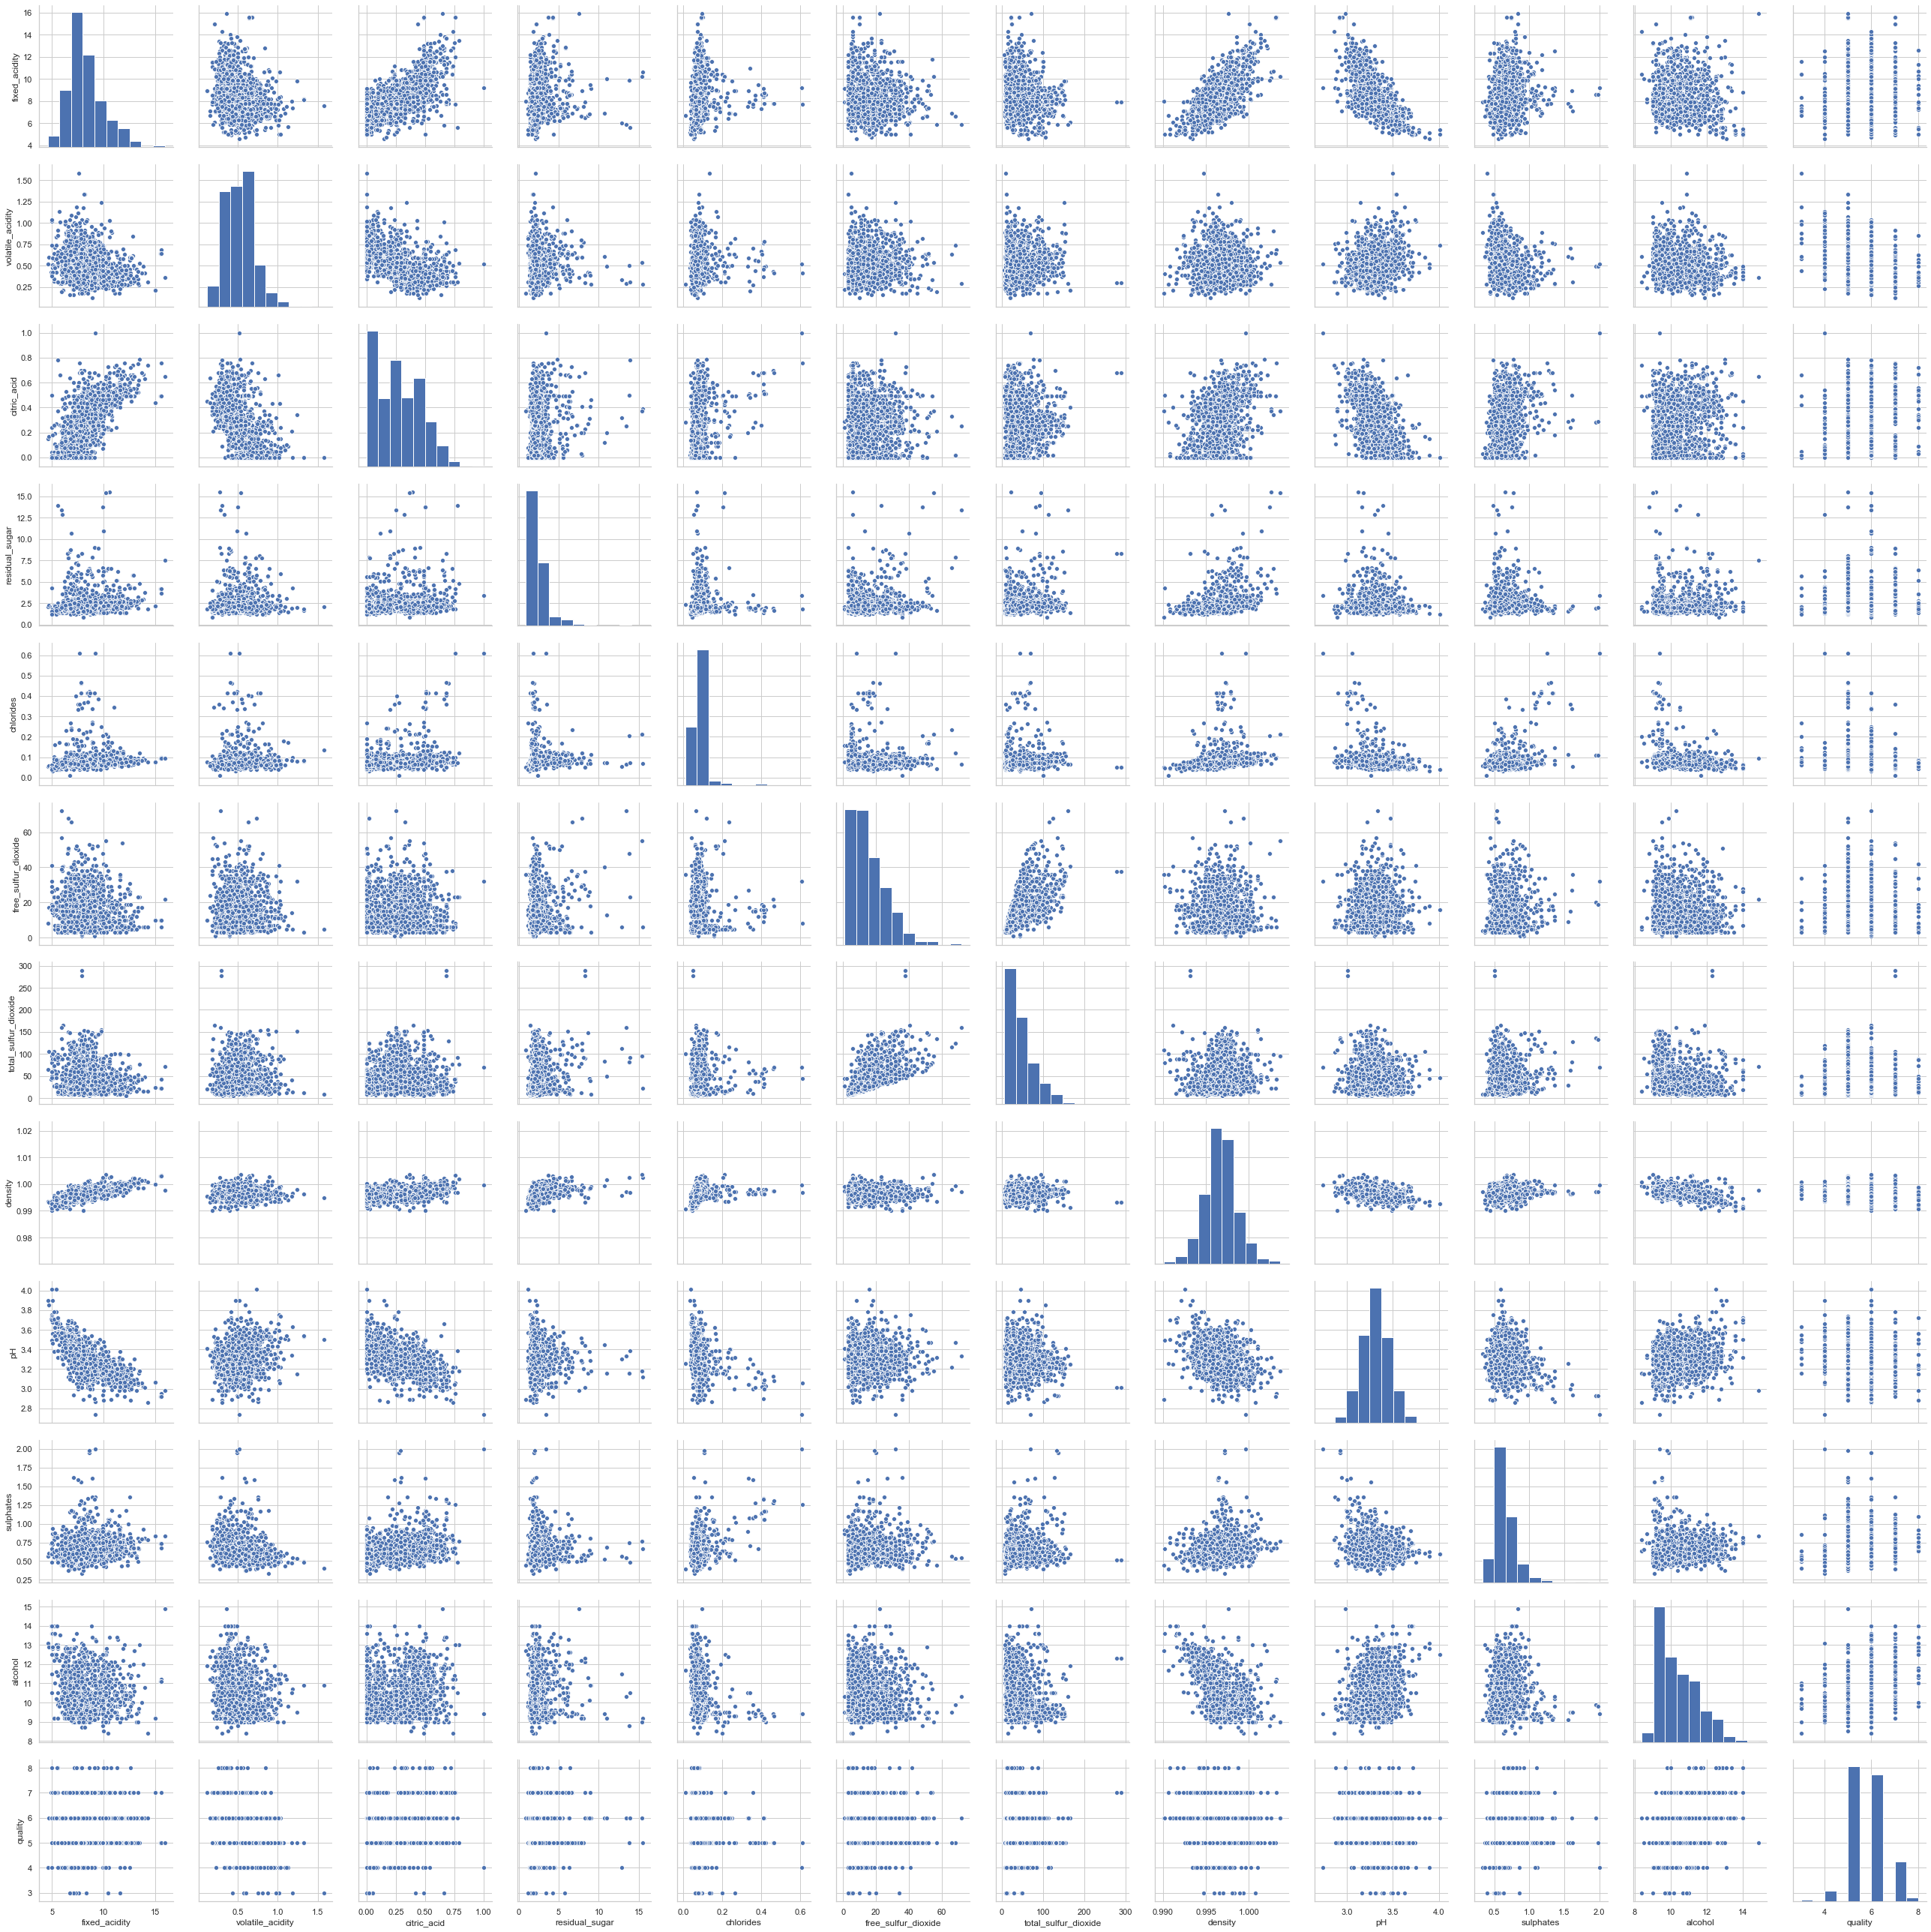

In [119]:
import seaborn as sb
#Take columns excluding the output variable
column_list = list(red_wine.columns)[0:-1]

#Seaborn pair plot
sb.pairplot(red_wine.loc[:,column_list], size=3)

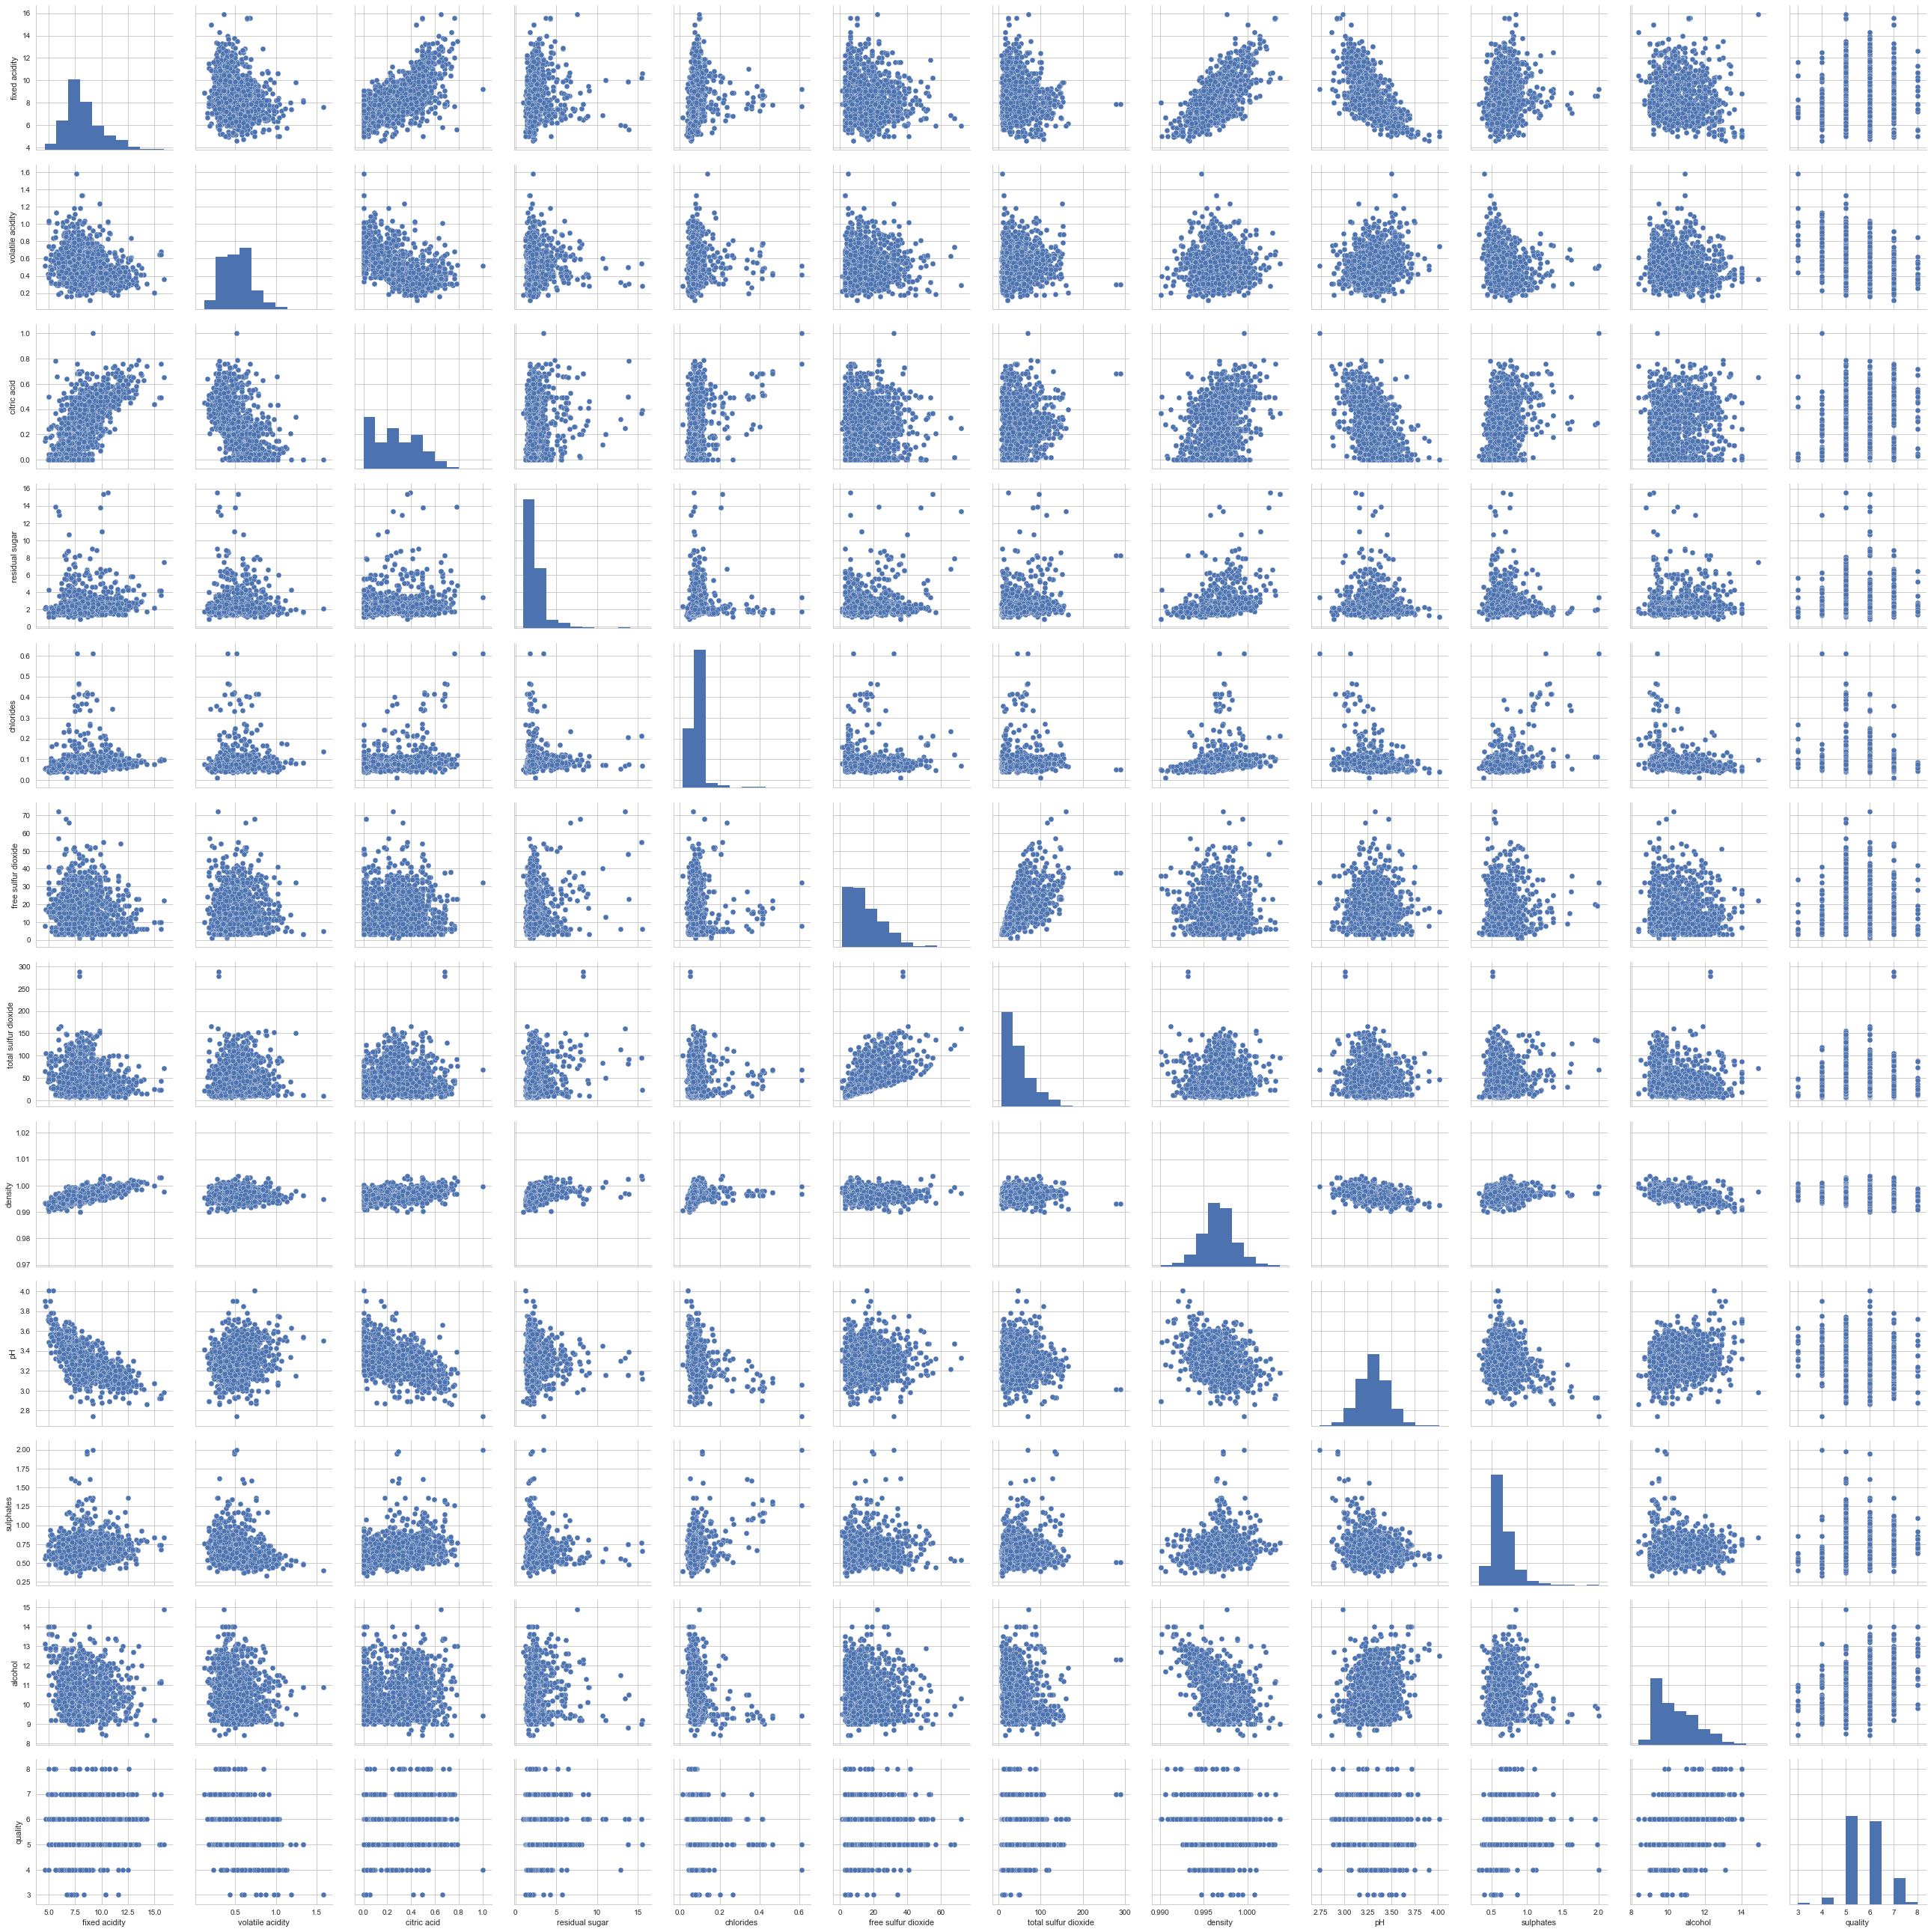

In [46]:
import seaborn as sb
#Take columns excluding the output variable
column_list = list(red_wine.columns)[0:-1]

#Seaborn pair plot
sb.pairplot(red_wine.loc[:,column_list], size=3)